<img src="../Pics/MLSb-T.png" width="160">
<br><br>
<center><u><H1>Logistic Regression</H1></u></center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df=pd.read_csv("../data/iris.csv")
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(['Iris-setosa','Iris-versicolor','Iris-virginica'])
y = le.transform(df['Species']) 
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['PetalLengthCm','PetalWidthCm']], y, 
                                                    test_size=0.3, random_state= 0)

In [5]:
# Standardize features:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [6]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Class predict:

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
X_test_std[0,:]

array([0.70793846, 1.50872803])

In [10]:
logreg = LogisticRegression(C=1000.0,n_jobs=-1)

In [11]:
logreg.fit(X_train_std, y_train)

C:\Users\rlin159922\AppData\Local\Continuum\A3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rlin159922\AppData\Local\Continuum\A3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\rlin159922\AppData\Local\Continuum\A3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
np.round(logreg.predict_proba(X_test_std[0,:].reshape(1, -1)))

array([[0., 0., 1.]])

In [13]:
logreg.score(X_test_std, y_test)

0.9777777777777777

In [14]:
from sklearn import metrics

In [15]:
print("Accuracy:", metrics.accuracy_score(y_test, logreg.predict(X_test_std)))

Accuracy: 0.9777777777777777


In [16]:
print("Confusion matrix:", metrics.confusion_matrix(y_test, logreg.predict(X_test_std)))

Confusion matrix: [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [17]:
print("Classification report:", metrics.classification_report(y_test, logreg.predict(X_test_std)))

Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Avoiding overfitting via regularization:
Overfitting is a common problem in machine learning, where a model performs well on training data but does not generalize well to unseen data like test data.
C  is directly related to the regularization parameter wich is its inverse.
Decreasing the value of C means that we are increasing the regularization strength.

C:\Users\rlin159922\AppData\Local\Continuum\A3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rlin159922\AppData\Local\Continuum\A3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\rlin159922\AppData\Local\Continuum\A3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rlin159922\AppData\Local\Continuum\A3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\rlin15992

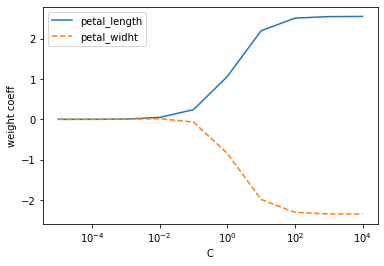

In [18]:
# Lets plot different values of C:
weights, params = [], []
for n in range(-5,5):
    lr = LogisticRegression(C=10**n)
    lr.fit(X_train_std, y_train)
    #coef_ : array, shape (n_classes, n_features)
    #regression.coef_[0] corresponds to "feature1" and regression.coef_[1] corresponds to "feature2"
    #we will use class 2 vs. all classifier, coef_[1]
    weights.append(lr.coef_[1])
    params.append(10**n)
weights = np.array(weights)
plt.plot(params, weights[:,0], label='petal_length')
plt.plot(params, weights[:,1], label='petal_widht', linestyle='--')
plt.ylabel('weight coeff')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='best')

plt.show()

## computing the score 5 consecutive times (with different splits each time)

In [19]:
from sklearn.model_selection import cross_val_score
X = df[['PetalLengthCm','PetalWidthCm']]
y = df['Species']
scores = cross_val_score(logreg, X, y, cv=5, scoring='f1_macro')
scores

C:\Users\rlin159922\AppData\Local\Continuum\A3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rlin159922\AppData\Local\Continuum\A3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\rlin159922\AppData\Local\Continuum\A3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\rlin159922\AppData\Local\Continuum\A3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rlin159922\A

array([0.96658312, 0.96658312, 0.93265993, 0.93265993, 1.        ])

## Predictions by cross-validation:

In [20]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
X = df[['PetalLengthCm','PetalWidthCm']]
y = df['Species']
predicted = cross_val_predict(logreg, X, y, cv=10)
metrics.accuracy_score(y, predicted) 

C:\Users\rlin159922\AppData\Local\Continuum\A3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rlin159922\AppData\Local\Continuum\A3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\rlin159922\AppData\Local\Continuum\A3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\rlin159922\AppData\Local\Continuum\A3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rlin159922\A

0.96

## Reference: 
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
